In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mymoviedb.csv',lineterminator='\n')

df.dropna(inplace=True)
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [3]:
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year
print(df['Release_Date'].dtype)
df.head()

int32


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] =pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df




In [7]:
labels = ['not_popular', 'below_popular', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_popular,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_popular    2398
Name: count, dtype: int64

In [9]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True, errors='ignore')

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [10]:
df['Genre']= df['Genre'].astype('category')
df['Genre'].dtypes
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

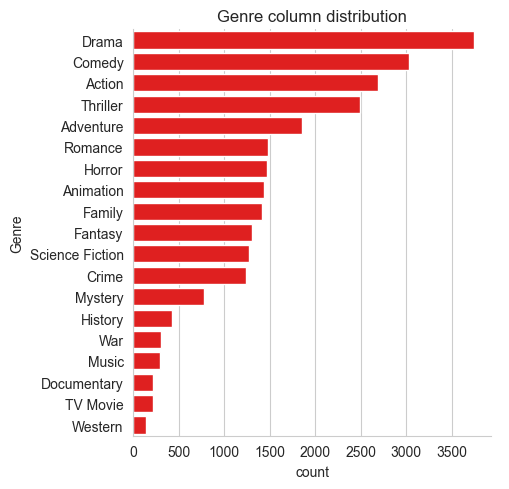

In [11]:
#What is the most frequent genre of movies released on Netflix?

sns.set_style('whitegrid')
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color='red')
plt.title('Genre column distribution')
plt.tight_layout()
plt.show()



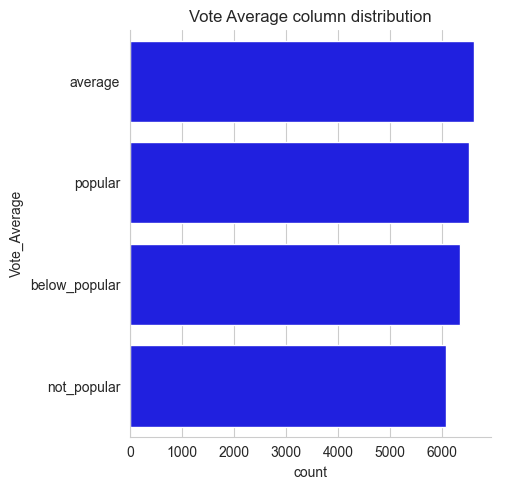

In [12]:
#Which has highest votes avg columns?

sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = 'blue')
plt.title('Vote Average column distribution')

plt.tight_layout()
plt.show()


In [13]:
#What movie got the highest popularity? what's its genre?

df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [14]:
#Which has the lowest popularity? what's its genre?

df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


In [15]:
df[df['Release_Date'] == df['Release_Date'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9137,2024,Despicable Me 4,27.987,0,NaN,Animation
9138,2024,Despicable Me 4,27.987,0,NaN,Family
9139,2024,Despicable Me 4,27.987,0,NaN,Comedy
9140,2024,Despicable Me 4,27.987,0,NaN,Adventure


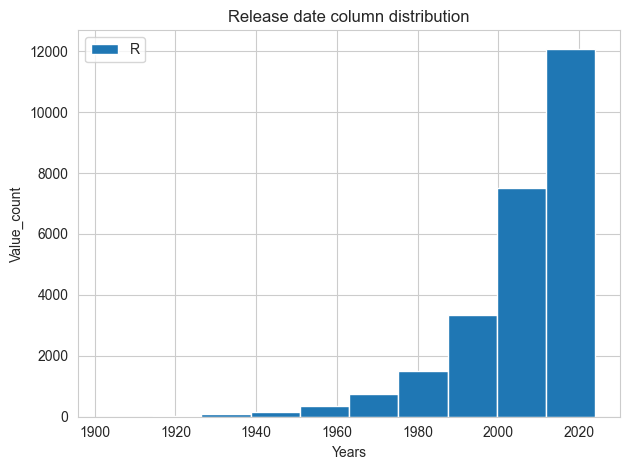

In [16]:
#Which year has the most filmmed movies?

df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.ylabel('Value_count')
plt.xlabel('Years')
plt.tight_layout()
plt.legend('Release year', loc = 'upper left')
plt.show()